KNN

In [ ]:
import pandas as pd
data=pd.read_csv("/content/test.csv")

In [ ]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
data.shape

(1000, 21)

In [ ]:
data.isna().any()

,0
id,False
battery_power,False
blue,False
clock_speed,False
dual_sim,False
fc,False
four_g,False
int_memory,False
m_dep,False
mobile_wt,False


In [ ]:
data.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
data.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [ ]:
x=data.iloc[:,:21]

In [ ]:
x.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
y=data.wifi

In [ ]:
y.head()

,wifi
0,0
1,0
2,1
3,0
4,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

In [ ]:
x_train

array([[ 0.66822613,  1.56514023, -1.01257911, ...,  0.14959411,
         0.57350122, -1.02275892],
       [ 0.0233675 ,  0.45151184,  0.98757716, ..., -0.03173208,
         0.57350122, -1.02275892],
       [-0.55597073, -1.5975644 ,  0.98757716, ..., -0.21305828,
         0.57350122, -1.02275892],
       ...,
       [ 0.4682165 , -1.47799588, -1.01257911, ...,  0.14959411,
         0.57350122,  0.97774752],
       [ 0.22682557,  0.46088976, -1.01257911, ..., -0.21305828,
         0.57350122, -1.02275892],
       [ 0.65788081, -1.6585209 ,  0.98757716, ...,  0.6935727 ,
         0.57350122, -1.02275892]])

In [ ]:
xtest1=sd.fit_transform(x_test)
xtest1

array([[ 1.66111295, -1.40480973,  0.89543386, ..., -0.68994052,
         0.54653573,  1.0944415 ],
       [ 1.18589623, -1.37156714,  0.89543386, ...,  1.34746773,
         0.54653573,  1.0944415 ],
       [-0.80363048,  0.50774733,  0.89543386, ..., -0.13428373,
         0.54653573,  1.0944415 ],
       ...,
       [-1.09798114, -0.5537994 ,  0.89543386, ..., -0.68994052,
         0.54653573, -0.91370804],
       [ 0.45533918, -0.587042  , -1.11677706, ..., -0.13428373,
         0.54653573, -0.91370804],
       [-1.32849671, -0.49839509, -1.11677706, ..., -0.87515946,
         0.54653573,  1.0944415 ]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=5
model=KNeighborsClassifier(n_neighbors=k)

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

In [ ]:
x_train=sd.fit_transform(x_train)
x_test=sd.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=k)


In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
ypred=model.predict(x_test)
ypred


array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,ypred)
score

0.445

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
cm

array([[37, 56],
       [55, 52]])

In [ ]:
acc=(52+37)/(52+37+56+55)
acc

0.445

In [ ]:
y_train.value_counts()

,count
wifi,
0,400
1,400


Naive Bayes Classifier

In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
data=pd.read_csv('/content/test.csv')

In [ ]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
data.isna().any()

,0
id,False
battery_power,False
blue,False
clock_speed,False
dual_sim,False
fc,False
four_g,False
int_memory,False
m_dep,False
mobile_wt,False


In [ ]:
x=data.iloc[:,:21]

In [ ]:
x.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
y = data.wifi
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=2, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

In [ ]:
sd.fit(x_train)

StandardScaler()

In [ ]:
xtrain1=sd.transform(x_train)

In [ ]:
sd=StandardScaler()

In [ ]:
sd.fit(x_test)

StandardScaler()

In [ ]:
xtest1=sd.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [ ]:
nb.fit(xtrain1,y_train)

GaussianNB()

In [ ]:
ypred1=nb.predict(xtest1)
ypred1

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,ypred1)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
label=['yes','no']

In [ ]:
cm1=confusion_matrix(y_test,ypred1)

In [ ]:
cmdl=ConfusionMatrixDisplay(cm1,display_labels=label)

In [ ]:
print(cmdl)

In [ ]:
cmdl.plot()

In [ ]:
from sklearn.naive_bayes import BernoulliNB


In [ ]:
model=BernoulliNB()

In [ ]:
model.fit(xtrain1,y_train)

BernoulliNB()

In [ ]:
ypred=model.predict(xtest1)


In [ ]:
metrics.accuracy_score(y_test,ypred)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
label=['yes','no']

In [ ]:
cm=confusion_matrix(y_test,ypred)

In [ ]:
cmd=ConfusionMatrixDisplay(cm,display_labels=label)

In [ ]:
print(cm)

[[ 98   0]
 [  0 102]]


In [ ]:
acc=(98+102)/(98+102)
acc

1.0

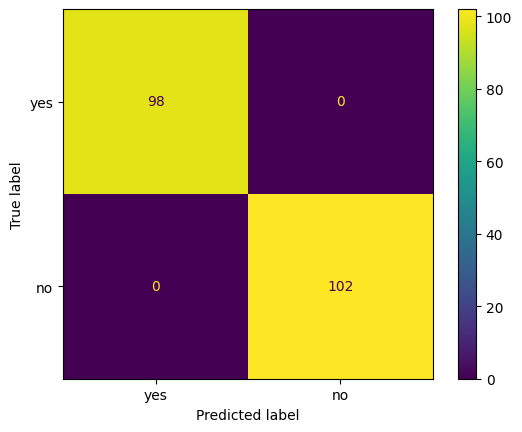

In [ ]:
cmd.plot()

DECISION TREE

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/test.csv')

In [ ]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
data.wifi.value_counts()

,count
wifi,
1,507
0,493


In [ ]:
data.isnull().any()

,0
id,False
battery_power,False
blue,False
clock_speed,False
dual_sim,False
fc,False
four_g,False
int_memory,False
m_dep,False
mobile_wt,False


In [ ]:
x=data.iloc[:,:21]

In [ ]:
x.head(2)

In [ ]:
y=data.wifi

In [ ]:
y.head(2)

,wifi
0,0
1,0


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn import tree

In [ ]:
dt=tree.DecisionTreeClassifier()

In [ ]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
ypred=dt.predict(xtest)
ypred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1])

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.figure(figsize=(15,15))


<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

[Text(0.5, 0.75, 'x[20] <= 0.5\ngini = 0.5\nsamples = 800\nvalue = [400, 400]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 400\nvalue = [400, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 400\nvalue = [0, 400]'),
 Text(0.625, 0.5, '  False')]

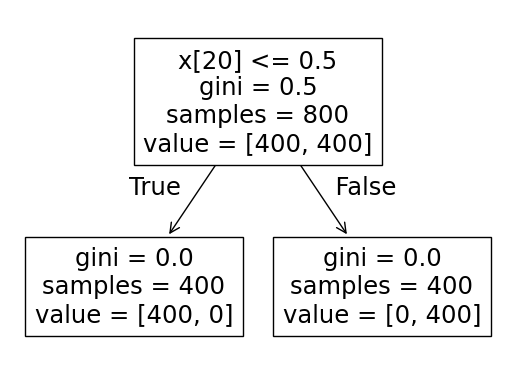

In [ ]:
tree.plot_tree(dt)

In [ ]:
plt.show()

In [ ]:
ytrain.value_counts()

,count
wifi,
0,400
1,400


In [ ]:
plt.figure(figsize=(15,15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

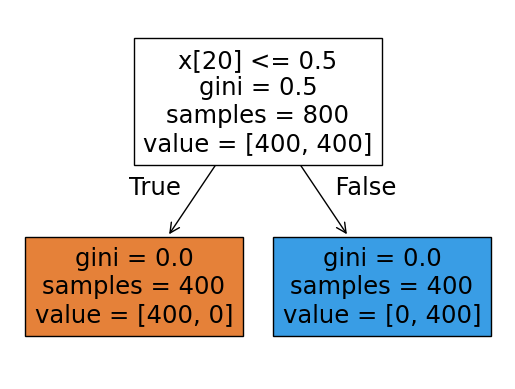

In [ ]:
tree.plot_tree(dt,filled=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,ypred)

1.0

In [ ]:
confusion_matrix(ytest,ypred)

array([[ 93,   0],
       [  0, 107]])

In [ ]:
acc=(93+107)/(93+107)
acc

1.0